In [1]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [7]:
# Load datasets
profile_df = pd.read_csv('C:/Users/Bhavya Jha/OneDrive/Desktop/Projects/prediction_model/student_profile_data.csv')
engagement_df = pd.read_csv('C:/Users/Bhavya Jha/OneDrive/Desktop/Projects/prediction_model/course_engagement_data.csv')
historical_df = pd.read_csv('C:/Users/Bhavya Jha/OneDrive/Desktop/Projects/prediction_model/historical_data.csv')


# Preview the data to check the first few rows
print(profile_df.head())
print(engagement_df.head())
print(historical_df.head())


   student_id  age  gender         major  year         region
0           1   25  Female   Electronics     2        Gujarat
1           2   21    Male   Electronics     4      Karnataka
2           3   17    Male    Mechanical     4  Uttar Pradesh
3           4   25  Female         Civil     1     Tamil Nadu
4           5   19  Female  Computer Sci     2     Tamil Nadu
   student_id  logins_per_week  videos_watched  time_spent_on_platform (hrs)  \
0           1                2               9                          13.1   
1           2                4              10                          19.4   
2           3                4               9                          19.8   
3           4                7               8                          17.2   
4           5                7              11                          18.4   

   avg_quiz_score  
0            50.5  
1            69.3  
2            63.5  
3            54.6  
4            71.2  
   student_id  courses_comp

In [8]:
# Merge the three dataframes on 'student_id'
merged_df = pd.merge(profile_df, engagement_df, on='student_id')
merged_df = pd.merge(merged_df, historical_df, on='student_id')

# Preview the merged data
print(merged_df.head())


   student_id  age  gender         major  year         region  \
0           1   25  Female   Electronics     2        Gujarat   
1           2   21    Male   Electronics     4      Karnataka   
2           3   17    Male    Mechanical     4  Uttar Pradesh   
3           4   25  Female         Civil     1     Tamil Nadu   
4           5   19  Female  Computer Sci     2     Tamil Nadu   

   logins_per_week  videos_watched  time_spent_on_platform (hrs)  \
0                2               9                          13.1   
1                4              10                          19.4   
2                4               9                          19.8   
3                7               8                          17.2   
4                7              11                          18.4   

   avg_quiz_score  courses_completed  courses_started  \
0            50.5                  2                4   
1            69.3                  2                8   
2            63.5            

In [10]:
# Check the column names in the merged DataFrame
print(merged_df.columns)


Index(['student_id', 'age', 'gender', 'major', 'year', 'region',
       'logins_per_week', 'videos_watched', 'time_spent_on_platform (hrs)',
       'avg_quiz_score', 'courses_completed', 'courses_started',
       'avg_score_across_courses'],
      dtype='object')


In [11]:
# Check the column names in the merged DataFrame
print(merged_df.columns)


In [12]:

# Define thresholds for completion
course_completion_threshold = 3
average_quiz_score_threshold = 70
logins_per_week_threshold = 4

# Update the function with the correct column name
def determine_completion_status(row):
    if (row['courses_completed'] > course_completion_threshold and 
        row['avg_score_across_courses'] > average_quiz_score_threshold and  # Use the correct name here
        row['logins_per_week'] > logins_per_week_threshold):
        return 1  # Likely to complete
    else:
        return 0  # Likely to drop out

# Apply the function to create the target variable
merged_df['completion_status'] = merged_df.apply(determine_completion_status, axis=1)

# Preview the data to check the target variable
print(merged_df[['student_id', 'courses_completed', 'avg_score_across_courses', 'logins_per_week', 'completion_status']].head())


   student_id  courses_completed  avg_score_across_courses  logins_per_week  \
0           1                  2                      60.1                2   
1           2                  2                      76.2                4   
2           3                  7                      89.2                4   
3           4                  5                      71.4                7   
4           5                  3                      80.7                7   

   completion_status  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  


In [19]:
# Step 1: Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Step 2: Calculate percentage of missing values
total = merged_df.isnull().count()
percent_missing = (missing_values / total) * 100
missing_data = pd.DataFrame({'Total Missing': missing_values, 'Percent Missing': percent_missing})
print("\nPercentage of Missing Values:")
print(missing_data[missing_data['Total Missing'] > 0])

# Step 3: Decide how to handle missing values
# Dropping rows with missing values (if the amount is small)
# Uncomment the next line if you want to drop rows instead
# merged_df.dropna(inplace=True)

# Fill missing numerical values with the mean
numerical_cols = ['logins_per_week', 'time_spent_on_platform (hrs)', 'avg_quiz_score', 'courses_completed', 'courses_started', 'avg_score_across_courses']
for col in numerical_cols:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)  # Using mean

# Fill missing categorical values with the mode
categorical_cols = ['gender', 'major', 'region']
for col in categorical_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)  # Using mode

# Step 4: Check for remaining missing values
print("\nRemaining Missing Values After Handling:")
print(merged_df.isnull().sum())


Missing Values in Each Column:
Series([], dtype: int64)

Percentage of Missing Values:
Empty DataFrame
Columns: [Total Missing, Percent Missing]
Index: []

Remaining Missing Values After Handling:
student_id                      0
age                             0
gender                          0
major                           0
year                            0
region                          0
logins_per_week                 0
videos_watched                  0
time_spent_on_platform (hrs)    0
avg_quiz_score                  0
courses_completed               0
courses_started                 0
avg_score_across_courses        0
completion_status               0
dtype: int64


C:\Users\Bhavya Jha\AppData\Local\Temp\ipykernel_18024\80595847.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mean(), inplace=True)  # Using mean
C:\Users\Bhavya Jha\AppData\Local\Temp\ipykernel_18024\80595847.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Show the first few rows of the dataset
print(merged_df.head())

# Get data types and check for missing values
print(merged_df.info())

# Get descriptive statistics for numerical columns
print(merged_df.describe())


   student_id  age  gender         major  year         region  \
0           1   25  Female   Electronics     2        Gujarat   
1           2   21    Male   Electronics     4      Karnataka   
2           3   17    Male    Mechanical     4  Uttar Pradesh   
3           4   25  Female         Civil     1     Tamil Nadu   
4           5   19  Female  Computer Sci     2     Tamil Nadu   

   logins_per_week  videos_watched  time_spent_on_platform (hrs)  \
0                2               9                          13.1   
1                4              10                          19.4   
2                4               9                          19.8   
3                7               8                          17.2   
4                7              11                          18.4   

   avg_quiz_score  courses_completed  courses_started  \
0            50.5                  2                4   
1            69.3                  2                8   
2            63.5            

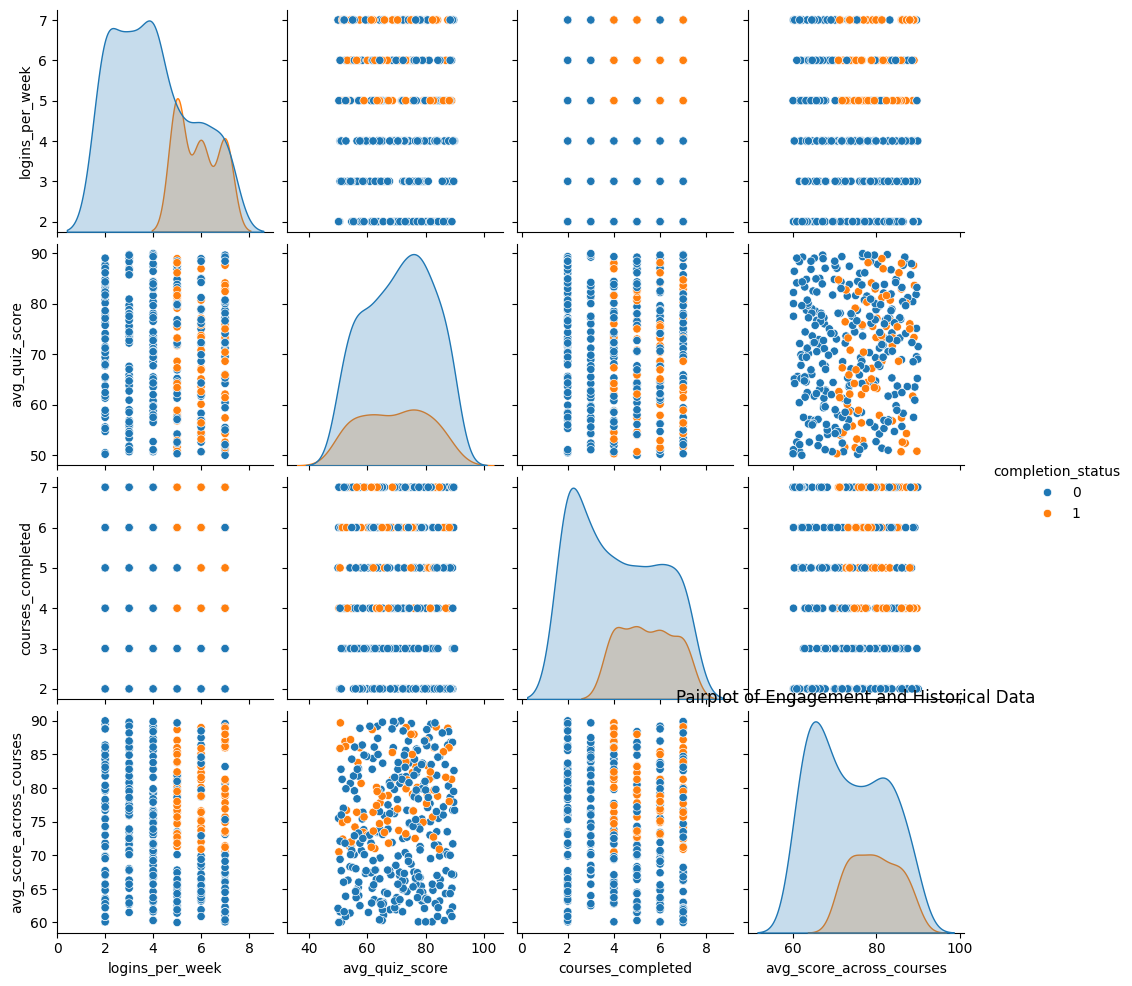

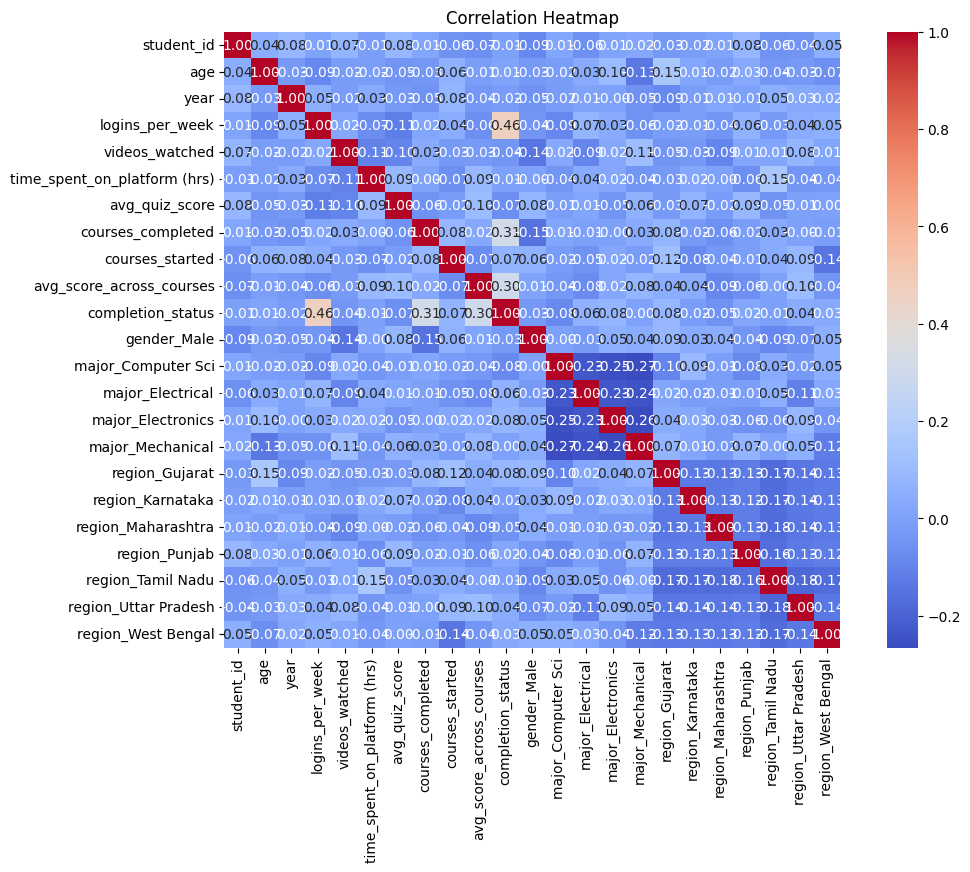

In [21]:
# Visualizing Relationships
# 1. Pairplot to explore relationships
sns.pairplot(merged_df, hue='completion_status', vars=['logins_per_week', 'avg_quiz_score', 
                                                       'courses_completed', 'avg_score_across_courses'])
plt.title('Pairplot of Engagement and Historical Data')
plt.show()

# 2. Correlation Heatmap
# Convert categorical columns to numeric using one-hot encoding
encoded_df = pd.get_dummies(merged_df, columns=['gender', 'major', 'region'], drop_first=True)

# Now calculate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
# Get data types and check for missing values
print("\nData Types and Missing Values:")
print(merged_df.info())

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(merged_df.describe())



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    350 non-null    int64  
 1   age                           350 non-null    int64  
 2   gender                        350 non-null    object 
 3   major                         350 non-null    object 
 4   year                          350 non-null    int64  
 5   region                        350 non-null    object 
 6   logins_per_week               350 non-null    int64  
 7   videos_watched                350 non-null    int64  
 8   time_spent_on_platform (hrs)  350 non-null    float64
 9   avg_quiz_score                350 non-null    float64
 10  courses_completed             350 non-null    int64  
 11  courses_started               350 non-null    int64  
 12  avg_score_across_courses      35

In [29]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Bhavya Jha\AppData\Local\Temp\ipykernel_18024\2025059423.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mean(), inplace=True)  # Using mean
C:\Users\Bhavya Jha\AppData\Local\Temp\ipykernel_18024\2025059423.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values


Remaining Missing Values After Handling:
student_id                      0
age                             0
gender                          0
major                           0
year                            0
region                          0
logins_per_week                 0
videos_watched                  0
time_spent_on_platform (hrs)    0
avg_quiz_score                  0
courses_completed               0
courses_started                 0
avg_score_across_courses        0
completion_status               0
dtype: int64

Data Types Before Encoding:
student_id                        int64
age                               int64
gender                           object
major                            object
year                              int64
region                           object
logins_per_week                   int64
videos_watched                    int64
time_spent_on_platform (hrs)    float64
avg_quiz_score                  float64
courses_completed                 int64


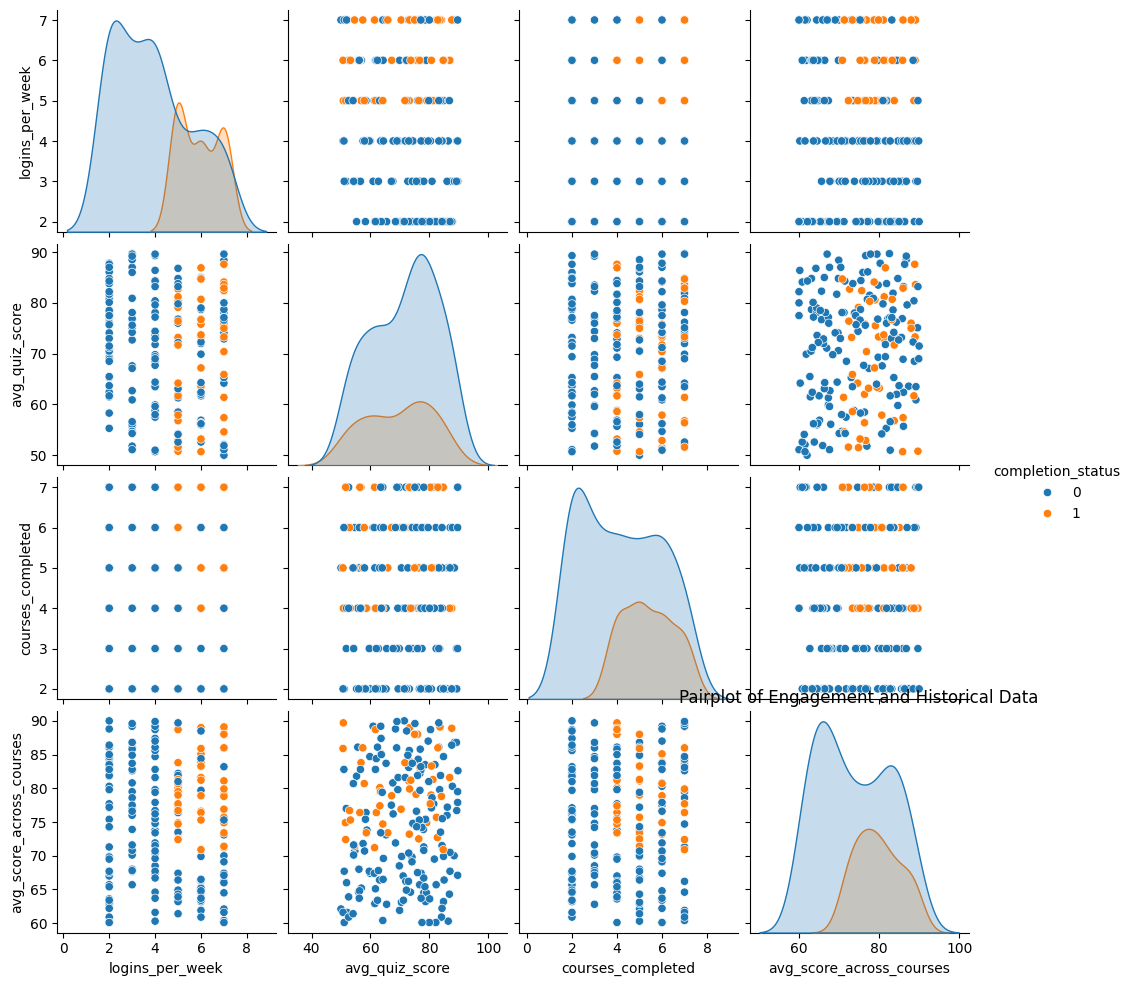

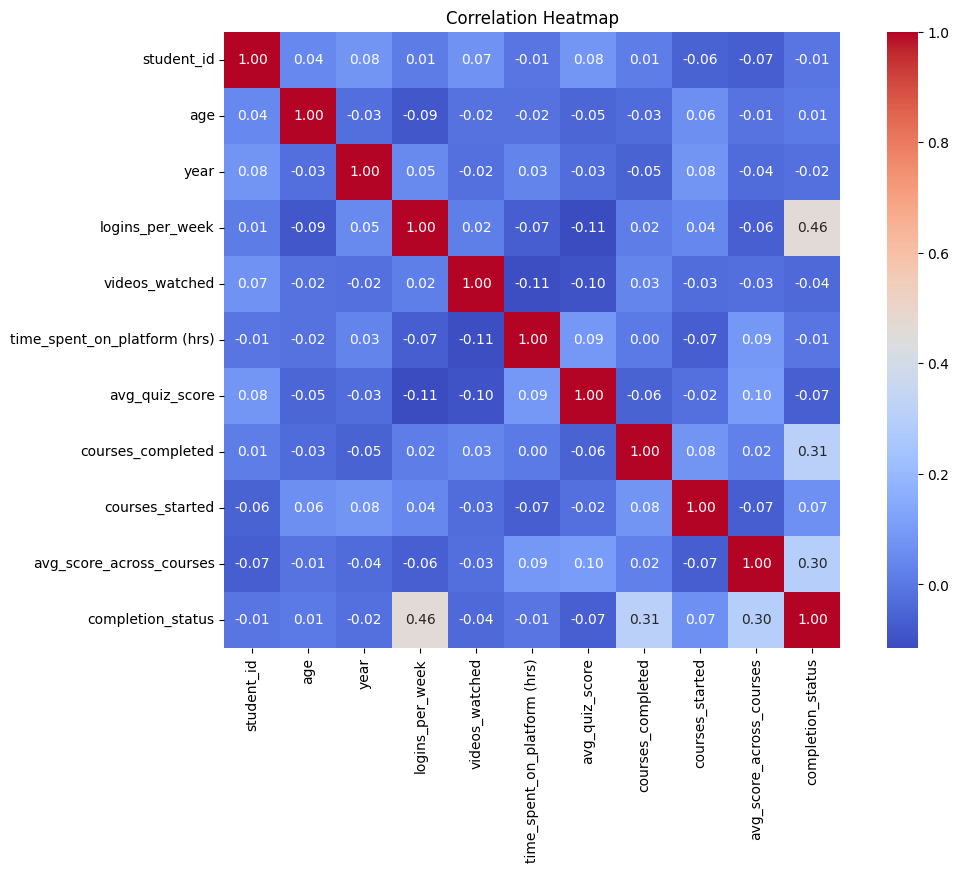


Descriptive Statistics:
       student_id         age        year  logins_per_week  videos_watched  \
count  350.000000  350.000000  350.000000       350.000000      350.000000   
mean   175.500000   21.057143    2.534286         4.417143        8.180000   
std    101.180532    2.378785    1.121665         1.683475        2.222353   
min      1.000000   17.000000    1.000000         2.000000        5.000000   
25%     88.250000   19.000000    2.000000         3.000000        6.000000   
50%    175.500000   21.000000    3.000000         4.000000        8.000000   
75%    262.750000   23.000000    4.000000         6.000000       10.000000   
max    350.000000   25.000000    4.000000         7.000000       12.000000   

       time_spent_on_platform (hrs)  avg_quiz_score  courses_completed  \
count                     350.00000      350.000000         350.000000   
mean                       15.06400       70.481429           4.428571   
std                         2.84419       11.31689

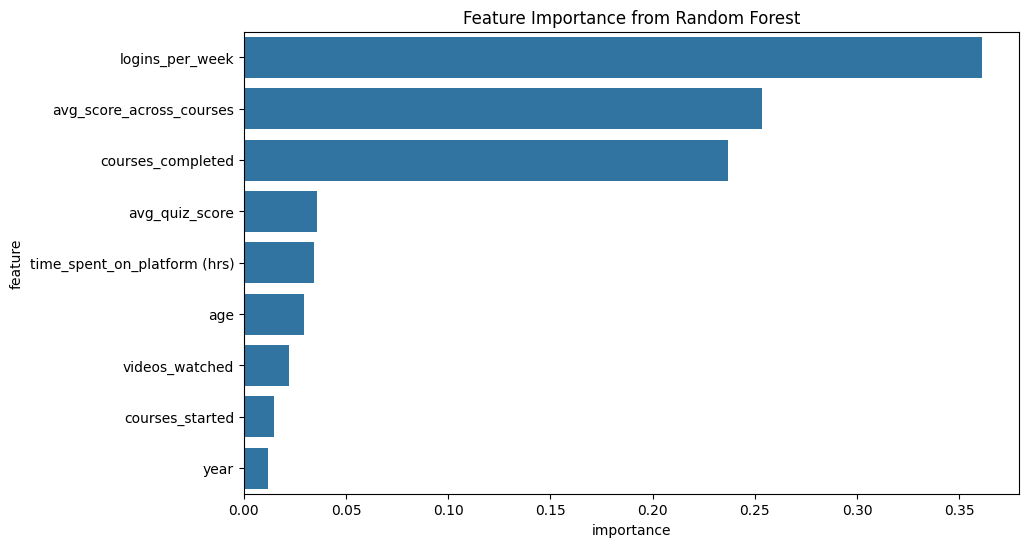

In [32]:
# Step 3: Handle missing values
# Fill missing numerical values with the mean
numerical_cols = ['logins_per_week', 'time_spent_on_platform (hrs)', 'avg_quiz_score', 
                  'courses_completed', 'courses_started', 'avg_score_across_courses']
for col in numerical_cols:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)  # Using mean

# Fill missing categorical values with the mode
categorical_cols = ['gender', 'major', 'region']
for col in categorical_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)  # Using mode

# Step 4: Check for remaining missing values
print("\nRemaining Missing Values After Handling:")
print(merged_df.isnull().sum())

# Check data types of each column
print("\nData Types Before Encoding:")
print(merged_df.dtypes)

# Convert categorical features to numeric using One-Hot Encoding
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

# Check data types again after encoding
print("\nData Types After Encoding:")
print(merged_df.dtypes)

# Ensure all columns are numeric before correlation analysis
print("\nChecking for Non-Numeric Columns:")
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Drop any non-numeric columns if found
if len(non_numeric_columns) > 0:
    merged_df.drop(columns=non_numeric_columns, inplace=True)

# Visualizing Relationships
# 1. Pairplot to explore relationships (using a sample of 200 for performance)
sns.pairplot(merged_df.sample(200), hue='completion_status', vars=['logins_per_week', 'avg_quiz_score', 
                                                                   'courses_completed', 'avg_score_across_courses'])
plt.title('Pairplot of Engagement and Historical Data')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(merged_df.describe())

# Feature Importance - Basic Analysis
# Define features and target variable
X = merged_df.drop(columns=['student_id', 'completion_status'])  # Drop 'student_id' and target
y = merged_df['completion_status']

# Ensure target variable is valid
print("\nTarget Variable:")
print(y.value_counts())

# Train a Random Forest classifier for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



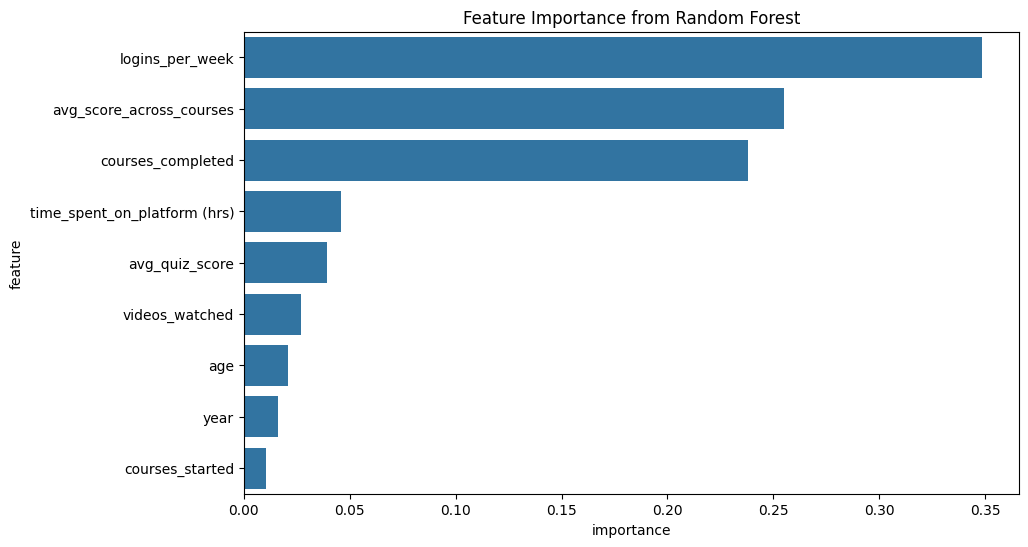

In [34]:
# Define features and target variable
X = merged_df.drop(columns=['student_id', 'completion_status'])  # Drop 'student_id' and target
y = merged_df['completion_status']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Choose and Train the Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# List of classifiers to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(probability=True)
}

# Step 1: Evaluate Each Classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



Random Forest Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Gradient Boosting Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Logistic Regression Model Evaluation:
Accuracy: 0.8761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       

C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [36]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("\nBest Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9904761904761905

Best Random Forest Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [37]:
from sklearn.model_selection import cross_val_score

# Cross-Validation for the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean Cross-Validation F1 Score:", cv_scores.mean())



Cross-Validation F1 Scores: [0.96551724 1.         1.         1.         1.        ]
Mean Cross-Validation F1 Score: 0.993103448275862



Final Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



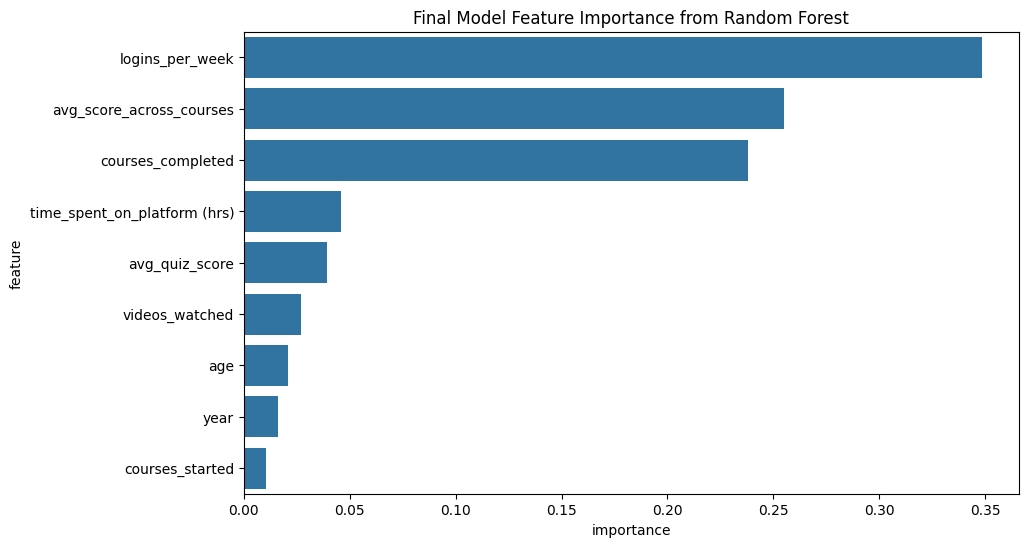

In [38]:
# Re-evaluate the best model on the test set
final_y_pred = best_model.predict(X_test)
print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, final_y_pred))
print("\nClassification Report:\n", classification_report(y_test, final_y_pred))

# Final Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance for the final model
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Final Model Feature Importance from Random Forest')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# List of classifiers to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(probability=True)
}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



Random Forest Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Gradient Boosting Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Logistic Regression Model Evaluation:
Accuracy: 0.8761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       

C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhavya Jha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
print("Best Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9904761904761905
Best Random Forest Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')

# Print cross-validation results
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean Cross-Validation F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.96551724 1.         1.         1.         1.        ]
Mean Cross-Validation F1 Score: 0.993103448275862


Final Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        25

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



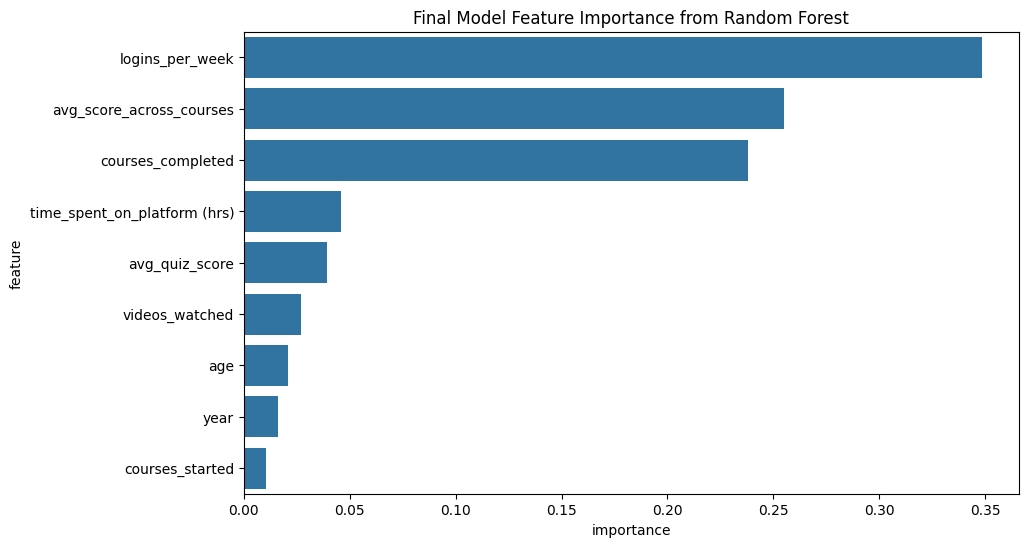

In [46]:
# Final predictions
final_y_pred = best_model.predict(X_test)

# Final evaluation
print("Final Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, final_y_pred))
print("\nClassification Report:\n", classification_report(y_test, final_y_pred))

# Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Final Model Feature Importance from Random Forest')
plt.show()


In [47]:
# Step 1: Predict the completion status for all students
merged_df['predicted_completion_status'] = best_model.predict(X)

# Step 2: Filter students predicted to drop out (classified as '0')
dropout_students = merged_df[merged_df['predicted_completion_status'] == 0]

# Step 3: Output the students who are likely to drop out
print("\nStudents Likely to Drop Out:")
print(dropout_students[['student_id', 'predicted_completion_status']])

# If you want to save the dropout students to a CSV file for further analysis
dropout_students.to_csv('likely_dropout_students.csv', index=False)



Students Likely to Drop Out:
     student_id  predicted_completion_status
0             1                            0
1             2                            0
2             3                            0
4             5                            0
7             8                            0
..          ...                          ...
338         339                            0
339         340                            0
341         342                            0
342         343                            0
347         348                            0

[272 rows x 2 columns]


In [48]:
import joblib

# Save the model
joblib.dump(best_model, 'student_completion_model.pkl')

# Load the model (for later use)
model = joblib.load('student_completion_model.pkl')


In [49]:
import numpy as np

# MAP@K Function
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k (AP@K)
    actual: list of relevant items
    predicted: list of predicted items
    k: number of top items to consider
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:  # Only count hit if not a duplicate
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual_list, predicted_list, k=10):
    """
    Computes the mean average precision at k (MAP@K)
    actual_list: list of lists with relevant items for each query/user
    predicted_list: list of lists with predicted items for each query/user
    """
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_list)])


# NDCG@K Function
def dcg_at_k(relevance_scores, k=10):
    """
    Computes the Discounted Cumulative Gain at k (DCG@K)
    relevance_scores: list of binary relevance scores (1 if relevant, 0 if not relevant)
    """
    relevance_scores = np.array(relevance_scores)[:k]
    return np.sum(relevance_scores / np.log2(np.arange(2, len(relevance_scores) + 2)))

def ndcg_at_k(actual, predicted, k=10):
    """
    Computes the Normalized Discounted Cumulative Gain at k (NDCG@K)
    actual: list of relevant items
    predicted: list of predicted items
    k: number of top items to consider
    """
    ideal_dcg = dcg_at_k(sorted([1 if i in actual else 0 for i in actual], reverse=True), k)
    if ideal_dcg == 0:
        return 0.0
    relevance_scores = [1 if p in actual else 0 for p in predicted]
    dcg = dcg_at_k(relevance_scores, k)
    return dcg / ideal_dcg


# Example Usage

# List of actual relevant items for each user/query
actual_list = [[1, 2, 3], [1], [2, 3, 4], [1, 2], [3]]

# List of predicted items for each user/query
predicted_list = [[1, 2, 4], [2], [1, 2, 3], [1, 3], [1, 2]]

# Calculate MAP@K
print(f'MAP@3: {mapk(actual_list, predicted_list, k=3)}')

# Calculate NDCG@K
ndcg_scores = [ndcg_at_k(actual, predicted, k=3) for actual, predicted in zip(actual_list, predicted_list)]
print(f'NDCG@3: {np.mean(ndcg_scores)}')


MAP@3: 0.31111111111111106
NDCG@3: 0.38184582074626466
